## 머신러닝
# 선형회귀 (Linear Regression)

- 회귀는 데이터가 주어졌을 때, **실수값**인 타겟값(또는 목표값)을 예측하는 방법이다.

나이 | 성별 | 키  | 몸무계
-----|------|-----|-------
35   | 남   | 175 | 67
...  | ...  | ... | ...
27   | 여   | 163 | 52

- 위와 같은 데이터가 주어졌을 때, 키(데이터)에 따른 몸무계(타겟값)를 예측하는 것은 회귀 문제이다.
- 회귀 중에서도, 직선 또는 곧은 평면(굽은 평면이 아님)으로 타겟값을 예측하는 것을 **선형회귀** 라고 한다. 아래 그림에서 직선으로 예측한 경우에 해당한다.

<img src="ch02_02.png" />
<p style="text-align: center;">(출처 : wikipedia - overfitting)</p>

- 속성이 하나 뿐일 때는 위와 같이 직선으로 표현할 수 있지만 속성이 2개일 때는 곧은 평면, 3개 이상에서는 초평면으로 표현한다.

<img src="ch02_03.jpg" />
<p style="text-align: center;">(출처 : https://www.dataquest.io/blog/statistical-learning-for-predictive-modeling-r/)</p>

- 선형회귀에서 굳이 타겟값을 별도로 구분했지만, 다르게 표현하면 타겟값을 포함한 모든 속성의 상관관계를 평면으로 표현한 것으로 이해할 수 있다.
- 아래에서 Iris 데이터를 가지고 선형회귀를 적용해 보겠다.

### 속성 3개로 나머지 속성값 예측하기
- 아이리스 데이터 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

- 앞의 속성 세가지를 가지고 마지막 속성인 Petal Width 값을 예측해 보자

In [2]:
X = iris.data[:,:3]
y = iris.data[:,3]

- 학습용과 테스트용 으로 데이터 분리하기

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

pred_y = model.predict(X_test)
display(y_test, pred_y)

model.score(X_test, y_test)

array([0.2, 2.4, 1.6, 0.3, 0.1, 2.3, 0.1, 1. , 0.2, 1.3, 2.5, 1. , 1.4,
       1. , 0.2, 1.8, 1. , 1.9, 0.4, 1.4, 0.2, 0.2, 1.5, 0.2, 1.8, 1.4,
       1.5, 1.3, 2.1, 1.8, 1.3, 0.2, 2.1, 0.4, 2. , 1.8, 1.5, 1.8])

array([0.0642743 , 2.02514745, 1.99775229, 0.35112963, 0.40312272,
       2.04864455, 0.11529686, 0.9956825 , 0.14419296, 1.44504209,
       2.30660378, 1.00167708, 2.03380896, 1.09916342, 0.40475397,
       2.15432712, 1.32009545, 1.85633881, 0.41705293, 1.59621791,
       0.29810086, 0.2604781 , 1.3232928 , 0.25514424, 1.99085234,
       1.50120306, 1.52593129, 1.58125202, 2.01714667, 1.72546274,
       1.43807699, 0.27447346, 2.33876238, 0.18648886, 1.81774552,
       2.21921475, 1.45890716, 1.63214428])

0.9143043234589318

(-0.029856630824372773,
 2.6298566308243725,
 -0.07853990676632204,
 2.471726963288465)

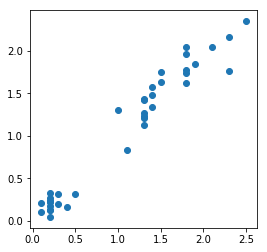

In [8]:
plt.scatter(y_test, pred_y)
plt.axis('scaled')

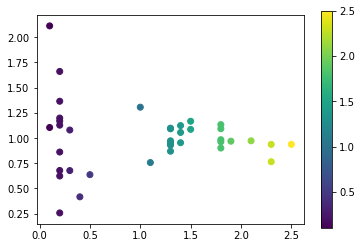

In [15]:
plt.scatter(y_test, pred_y/y_test, c=y_test)
plt.axis('scaled')
plt.colorbar()

- 선형회귀 모델 불러와 학습하기
- 선형회귀 모델 => LinearRegression
- 학습 => fit()

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- 학습결과 평가하기 (테스트 데이터 사용)

In [17]:
model.score(X_test, y_test) # 1에 가까울 수록 좋은 결과이다

0.952866367206693

In [18]:
pred_y = model.predict(X_test)
display(pred_y[:10], y_test[:10])

array([1.26352728, 1.75774873, 0.33215367, 0.23960533, 2.15367193,
       0.16628634, 0.12451726, 0.17210641, 0.32374373, 1.2075783 ])

array([1.3, 2.3, 0.2, 0.2, 2.3, 0.4, 0.2, 0.2, 0.3, 1.3])

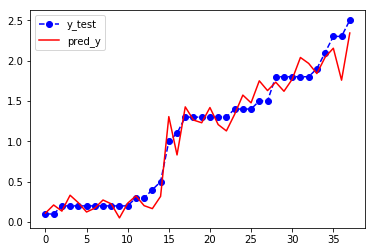

In [20]:
idx = np.argsort(y_test)

plt.plot(y_test[idx], 'bo--')
plt.plot(pred_y[idx], 'r-')
plt.legend(['y_test', 'pred_y'])

- 선형회귀의 결과 인자 확인하기
- coef_ => 각 속성의 가중치

In [23]:
model.coef_ # u = ax + by + cz + d => (a,b,c) 와 비슷한 개념

array([-0.22882722,  0.23629134,  0.52358256])

In [24]:
model.intercept_ # u = ax + by + cz + d => d 와 비슷한 개념

-0.16262978047454046

### 산점도로 속성들 간의 비례 관계 확인하기

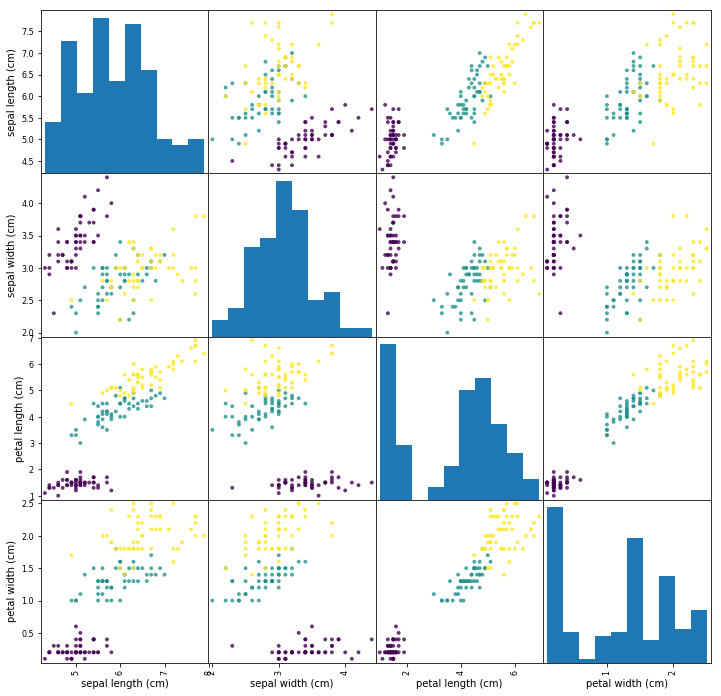

In [2]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, s=60, alpha=0.8, figsize=[12,12])
pass

- 위의 산점도에서 각 속성들 간의 상관관계를 짐작해 볼 수 있다.
- 위의 그림은 pandas 를 이용했지만 numpy 로 직접 그림을 그려보자.

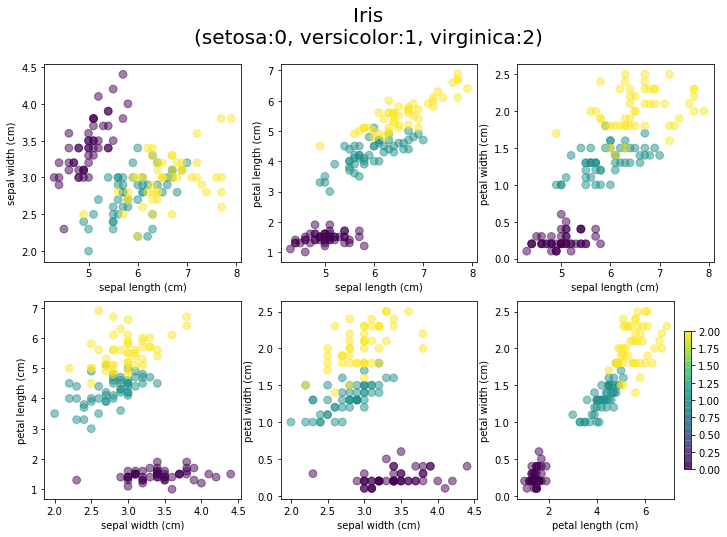

In [13]:
fig=plt.figure(figsize=[12,8])
fig.suptitle('Iris\n(setosa:0, versicolor:1, virginica:2)',fontsize=20)
count=0

for i in range(3):
    for j in range(i+1,4):
        count+=1
        plt.subplot(2,3,count)
        plt.scatter(iris.data[:,i],iris.data[:,j],c=iris.target,s=60,alpha=0.5)
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        
plt.colorbar(shrink=0.7)

- 위의 산점도에서 가장 크게 선형관계를 가지는 것은 petal length 와 petal width 이다.
- 아래에서 이 두 속성간의 상관관계를 직선으로 표현해 보자.
>참고 : 이 경우 petal length 가 데이터가 되고, petal width 가 타겟값이 된다. 반대로 적용해도 결과는 같다.

In [5]:
X = iris.data[:,[0]]
y = iris.data[:,1]

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.011961632834767588

In [6]:
w = model.coef_[0]
b = model.intercept_
w,b

(-0.057268233797164815, 3.3886373794881)

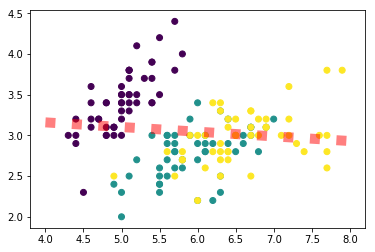

In [7]:
plt.scatter(X, y, c=iris.target)
plt.plot([4,8], [4*w+b,8*w+b], 'r:', linewidth=10, alpha=0.5)

In [8]:
X1 = iris.data[:50,[0]]
y1 = iris.data[:50,1]

model1 = LinearRegression()
model1.fit(X1, y1)
model1.score(X1, y1)

0.5576809258922097

In [9]:
w1 = model1.coef_[0]
b1 = model1.intercept_
w1, b1

(0.807233665122696, -0.623011727604216)

In [15]:
X2 = iris.data[50:,[0]]
y2 = iris.data[50:,1]

model2 = LinearRegression()
model2.fit(X2, y2)
model2.score(X2, y2)

0.3067551932220538

In [18]:
w2 = model2.coef_
b2 = model2.intercept_
w2, b2

(array([0.27804192]), 1.1309015164752294)

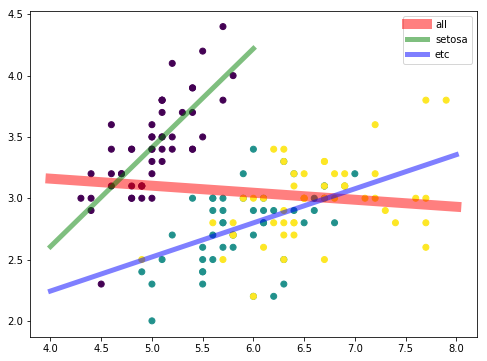

In [23]:
plt.figure(figsize=[8,6])
plt.scatter(X, y, c=iris.target)
plt.plot([4,8], [4*w+b,8*w+b], 'r-', linewidth=10, alpha=0.5, label='all')
plt.plot([4,6], [4*w1+b1,6*w1+b1], 'g-', linewidth=5, alpha=0.5, label='setosa')
plt.plot([4,8], [4*w2+b2,8*w2+b2], 'b-', linewidth=5, alpha=0.5, label='etc')
plt.legend()

In [34]:
model.predict([[6]]) # 2차원 형태로 입력해야함 (X 의 경우와 같음)

array([3.04502798])

In [35]:
6*w + b

3.045027976705111

### 속성 둘 간의 상관관계를 알아보자

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

iris.data[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [3]:
iris.data[:,0].shape

(150,)

- 데이터 부분의 속성이 하나인 경우 아래와 같이 2차원 형태로 바꾸어 주어야 한다.

In [6]:
iris.data[:, 0].reshape(-1,1)

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [9]:
iris.data[:, [2,3]] # [:,2:4]
iris.data[:, [0]]

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [8]:
col1 = 2
col2 = 3

X = iris.data[:, [col1]] # X = iris.data[:,col1].reshape(150,1)
y = iris.data[:, col2]

In [14]:
iris.data[:, col1].reshape(150,1)

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [12]:
iris.data[:, [0]]

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [54]:
col1 = 2
col2 = 3

X = iris.data[:, [col1]] # X = iris.data[:,col1].reshape(150,1)
y = iris.data[:, col2]

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

score = model.score(X, y) # R^2 값
print(score)

0.885202749819851


In [55]:
pred_y = model.predict(X)

[0, 8, 0, 3]

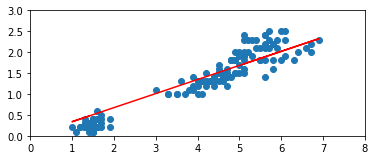

In [56]:
plt.scatter(X, y)
plt.plot(X, pred_y, c='red')
plt.axis('scaled')
plt.axis([0, 8, 0, 3])

In [57]:
MSE = ((y-pred_y)**2).mean()
RMSE = np.sqrt(MSE)
MAE = np.abs(y-pred_y).mean()
MSE, RMSE, MAE, model.score(X, y)

(0.06641383172022194,
 0.25770881187926414,
 0.21910213963092018,
 0.885202749819851)

In [58]:
model.coef_

array([0.33641889])

In [59]:
model.intercept_

0.0

In [24]:
w = model.coef_[0] # 기울기
b = model.intercept_ # y 절편

In [60]:
print('score = %.2f' % score) # print('score =', score)
print('w =',w)
print('b =',b)

score = 0.89
w = -0.057268233797164815
b = 3.3886373794881


In [53]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

(-0.4, 8.4, -0.5330816981308879, 3.1314066659806423)

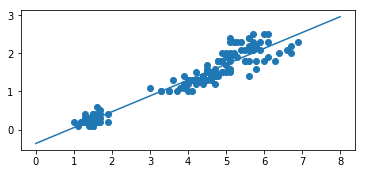

In [29]:
plt.scatter(X, y)

x = np.arange(0,8,0.1)
#plt.plot(x, w*x+b, 'r-')
plt.plot([0,8], [0*w+b, 8*w+b])
plt.axis('scaled')

In [27]:
model.coef_ # 결과는 Numpy 어레이이다

array([0.41641913])

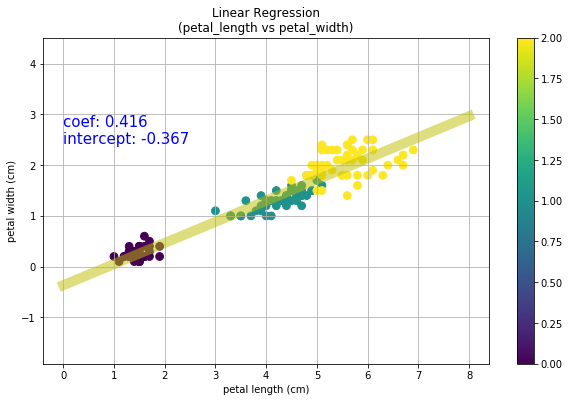

In [28]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,6))
plt.title('Linear Regression\n(petal_length vs petal_width)')

plt.scatter(X,y,c=iris.target,s=60)
plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.colorbar()

plt.plot([0,8],[0*w+b,8*w+b],'y',lw=10,alpha=0.5)
plt.text(0,3,'coef: %.3f\nintercept: %.3f' % (w,b), va='top', fontsize=15,color='b')
plt.axis('equal')
plt.grid()

In [28]:
result = model.predict([[4], [5], [6]])
display(result, 4*w+b)

array([1.29916248, 1.71558162, 2.13200075])

1.2991624839248772

In [31]:
model.predict(X[:10])

array([0.21647274, 0.21647274, 0.17483083, 0.25811465, 0.21647274,
       0.34139848, 0.21647274, 0.25811465, 0.21647274, 0.25811465])

In [32]:
y[:10]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1])

In [28]:
score = model.score(X, y)
display(score) # R^2 값

0.9269012279220037

- 회귀에서의 평가 점수는 $R^2$ (Coefficient of Determination, 결정계수) 이라는 것을 사용한다.<br>

> $R^2 = 1 - \frac{\sum (y-\hat{y})^2} {\sum (y-\bar{y})^2} $  ($\bar{y}$ 는 평균, $\hat{y}$ 는 예측값)<br>
> 평균값으로 예측한 경우에 비해 얼마나 잘 예측했는지를 평가한다. (최대값은 1)<br>
> $R^2$ 값이 1 이면 완벽하게 예측했다는 의미이고, 0 이면 누구나 하듯이 평균값으로 에측했다는 의미이다. 그리고 음수이면 평균값 예측보다도 못하다는 의미가 된다.

- 앞에서 model.fit() 을 하고 나면, model.coef\_ 으로 기울기 값을 model.intercept\_ 로 y절편 값을 얻을 수 있다.
- 그런데 앞의 예제는 앞에서 중요하게 강조했던 학습세트와 테스트세트로 분리하지 않았다. 그냥 전체 데이터를 사용하여 두 속성의 상관관계 만을 알고 싶었기 때문이다.
- 하지만 제대로 머신러닝 과정을 밟기 위해 아래에서 학습세트와 테스트세트로 분리하여 적용해 보자. 이렇게 하면 여러가지 예측모델 중에서 어떤 예측모델이 더 나은지 판단할 수 있게 된다.

### 학습용/테스트용 데이터 분리 적용

In [73]:
from sklearn.model_selection import train_test_split

X = iris.data[:,2].reshape(-1,1) # reshape() 함수에 주의
y = iris.data[:,3]

X_train,X_test,y_train,y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_[0] # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = 0.4105937421044269
b = -0.3452785689112521


In [74]:
score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print(score1, score2)

0.91942108489757 0.9478084251561508


- 결과에서 보듯이 테스트세트에 대한 $R^2$ 값이 학습세트에 대한 값 보다 못한 결과를 얻었다.
- 이것은 당연한데, 학습에 사용하지 않은 데이터로 테스트를 했기 때문이다.

- 이제 다른 방법으로 학습 결과를 평가해 보자.
- RMSE(root-mean-square error) = $\sqrt{\frac{(y-\hat{y})^2} {N} }$ , (RMSE 는 값이 작을 수록 결과가 좋은 것이다.)
- 선형회귀의 수학적 원리는 RMSE 를 최소화 하는 초평면을 찾는 것이다.

In [33]:
pred_y = model.predict(X_test)
pred_y

array([1.73899186, 0.21250567, 0.21250567, 0.21250567, 1.36768441,
       1.69773547, 0.29501844, 1.94527377, 1.61522271, 1.61522271,
       1.07888972, 1.73899186, 0.21250567, 2.02778654, 0.21250567,
       1.57396632, 0.17124929, 0.25376205, 1.28517164, 0.25376205,
       1.94527377, 1.86276101, 1.98653016, 1.28517164, 1.65647909,
       0.33627482, 1.65647909, 1.82150462, 0.25376205, 2.39909399,
       1.94527377, 2.06904292, 1.69773547, 1.1201461 , 1.78024824,
       0.25376205, 0.99637695, 0.25376205])

In [34]:
y_test

array([1.6, 0.2, 0.2, 0.2, 1.5, 1.9, 0.4, 2.1, 1.4, 1.8, 1. , 1.9, 0.2,
       2.2, 0.3, 1.5, 0.2, 0.3, 1.2, 0.4, 2.2, 2.3, 2.5, 1.3, 1.8, 0.4,
       1.5, 1.9, 0.2, 2. , 1.4, 2.1, 2. , 1.3, 2.3, 0.1, 1. , 0.2])

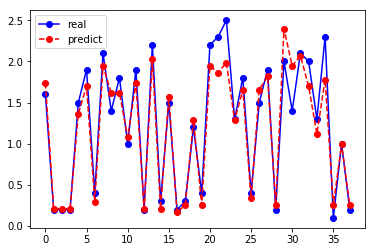

In [44]:
plt.plot(y_test, 'bo-')
plt.plot(pred_y, 'ro--')
plt.legend(['real', 'predict'])

In [39]:
np.abs(y_test - pred_y).mean()

0.1570489703960989

In [41]:
np.sqrt(np.square(y_test-pred_y).mean())

0.21499150857600016

In [42]:
import numpy as np

MSE = ((y_test - pred_y)**2).sum()/len(y_test)
RMSE = np.sqrt(MSE)
RMSE

0.21499150857600016

In [43]:
MAE = np.abs(y_test - pred_y).sum()/len(y_test)
MAE

0.1570489703960989

- 위의 결과는 한 샘플당 평균적으로 0.157 정도의 오차가 나는 것으로 해석 할 수 있다.

### 모든 속성 적용하기

- 이제 타겟값인 petal_width 를 제외한 나머지 세가지 속성을 모두 사용하여 선형회귀를 적용해 보자.
- 이럴 경우, 4차원 상에 3차원 초평면으로 예측하기 때문에 그림으로 결과를 표현하기는 쉽지 않다.

In [37]:
X = iris.data[:,:3]
y = iris.data[:,3]

X_train,X_test,y_train,y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_ # 기울기 (데이터의 속성이 3개이므로 값이 3개임)
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [-0.25262564  0.26218795  0.54348953]
b = -0.17445381394099968


In [45]:
score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
display('학습세트 점수: %f' % score1, '테스트세트 점수: %f' % score2) # R^2 값

'학습세트 점수: 0.926902'

'테스트세트 점수: 0.925286'

- 속성이 3개이므로 w 의 값은 3개이다.
> $pred\_y = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b$

- train_test_split() 함수를 호출할 때 마다 훈련세트/테스트세트 가 새롭게 구성되므로 score 가 달라질 수 있고 학습 보다 테스트 시 더 score 가 높은 경우도 있다.
- 다양한 선형회귀 모델은 다음 URL 을 참고하자. (http://scikit-learn.org/stable/modules/linear_model.html)
- 선형회귀의 변종인 릿지회귀와 라쏘회귀는 뒤에서 다룬다.
- 2차곡선, 3차곡선 과 같이 다항식을 적용한 다항회귀도 있다. (위 URL의 1.1.16 참고)

In [39]:
x = [[1,2,3], [2,2,4]]
model.predict(x)

array([1.72776505, 2.01862895])

In [40]:
# [1,2,3] 샘플에 대한 예측값 직접 계산
model.coef_[0]*1 + model.coef_[1]*2 + model.coef_[2]*3 + model.intercept_

1.7277650536860119

- 선형회귀에서 사용하는 선형 알고리즘은 다른 많은 머신러닝 알고리즘의 기반이 된다.
- 특히 신경망의 핵심 알고리즘은 선형회귀에서 나온 것이며, 가장 간단한 신경망은 곧 선형회귀와 같다.

In [46]:
X = iris.data[:,:2]
y = iris.data[:,3]

X_train,X_test,y_train,y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_ # 가중치
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [ 0.73769041 -0.51141073]
b = -1.5614067257337525


In [47]:
model.score(X_test, y_test)

0.7369987746782513

### 와인데이터 회귀 적용

In [86]:
wine = np.loadtxt('winequality-red.csv', skiprows=1, delimiter=';')

In [87]:
col1 = 0
col2 = 2

In [89]:
wine[:,2]

array([0.  , 0.  , 0.04, ..., 0.13, 0.12, 0.47])

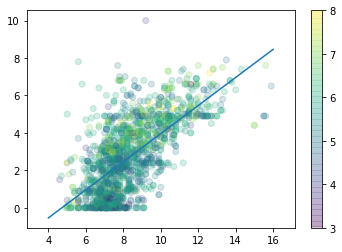

In [88]:
plt.scatter(wine[:,col1], wine[:,col2]*10, c=wine[:,-1], alpha=0.2)
plt.colorbar()
plt.axis('equal')
plt.plot([4,16],[4*0.75-3.54, 16*0.75-3.54])

In [84]:
X = wine[:,[0]]
y = wine[:,2]

model = LinearRegression()
model.fit(X, y)

w = model.coef_[0] # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = 0.0751529893715566
b = -0.3542700018191085


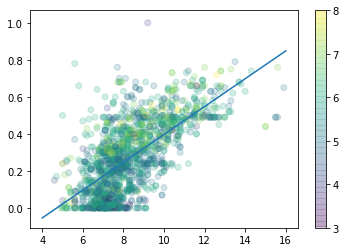

In [90]:
plt.scatter(wine[:,0], wine[:,2], c=wine[:,-1], alpha=0.2)
plt.colorbar()
plt.plot([4,16],[4*w+b, 16*w+b])

In [91]:
from sklearn.datasets import load_wine

wine2 = load_wine()
dir(wine2)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [93]:
wine2.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 모든 속성 적용하여 점수 예측

In [94]:
wine = np.loadtxt('winequality-red.csv', skiprows=1, delimiter=';')

X = wine[:,:-1]
y = wine[:,-1]

model = LinearRegression()
model.fit(X, y)

w = model.coef_ # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]
b = 21.965208449448404


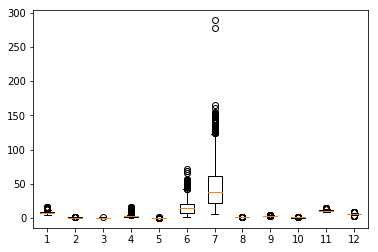

In [96]:
plt.boxplot(wine)
pass

In [49]:
model.score(X, y)

0.3605517030386881

In [97]:
pred_y = model.predict(X)

MAE = np.abs(y - pred_y).sum()/len(y)
MAE

0.5004899635644872

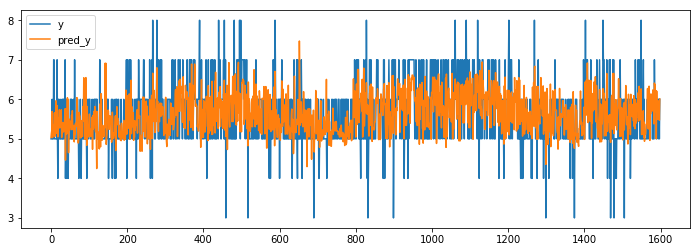

In [51]:
plt.figure(figsize=[12,4])
plt.plot(y)
plt.plot(pred_y)
plt.legend(['y', 'pred_y'])

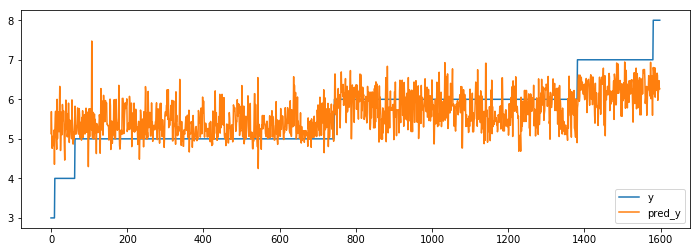

In [57]:
idx = np.argsort(y)

plt.figure(figsize=[12,4])
plt.plot(y[idx])
plt.plot(pred_y[idx])
plt.legend(['y', 'pred_y'])

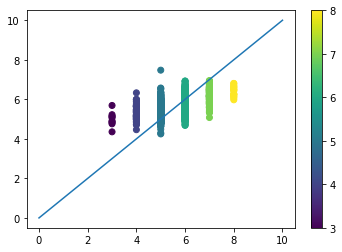

In [99]:
plt.scatter(y, pred_y, c=y)
plt.colorbar()
plt.plot([0,10], [0,10])

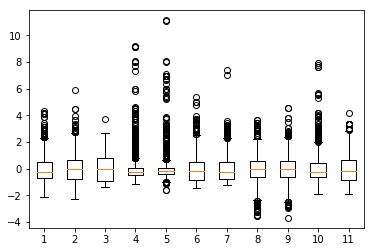

In [101]:
X_norm = (X-X.mean(axis=0))/X.std(axis=0)
plt.boxplot(X_norm)
pass

In [102]:
model = LinearRegression()
model.fit(X_norm, y)

w = model.coef_ # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [ 0.04349735 -0.19396667 -0.03555254  0.02301871 -0.08818339  0.04560596
 -0.10735582 -0.03373717 -0.06384247  0.1552765   0.29424288]
b = 5.636022514071305


In [103]:
model.score(X_norm, y)

0.3605517030386882

<Container object of 11 artists>

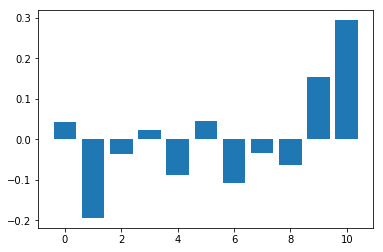

In [105]:
plt.bar(range(11), w)

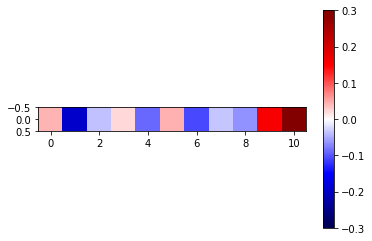

In [110]:
plt.imshow(w.reshape(1,-1), vmin= -0.3, vmax=0.3, cmap='seismic')
plt.colorbar()